In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import constants

plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 13

In [2]:
columns = constants.KEYS + constants.METRICS
legends = ["No processing", "Spellchecking (direct)", "Spellchecking (segmentation)", "Spellchecking (compound)", "Threshold (simple)",
          "Threshold (gaussian)", "Threshold (mean)", "Threshold (otsu)", "Blur (average)", "Blur (gaussian)", "Blur (median)",
          "Blur (bilateral)", "Dewarp (lazy)", "Dewarp (powell)", "Dewarp (l-bfgs-b)"]
filename = "../results/results"

In [3]:
df = pd.read_csv(filename, names=columns, index_col=False)

In [4]:
df.loc[df.wer > 1, 'wer'] = 1

<AxesSubplot:>

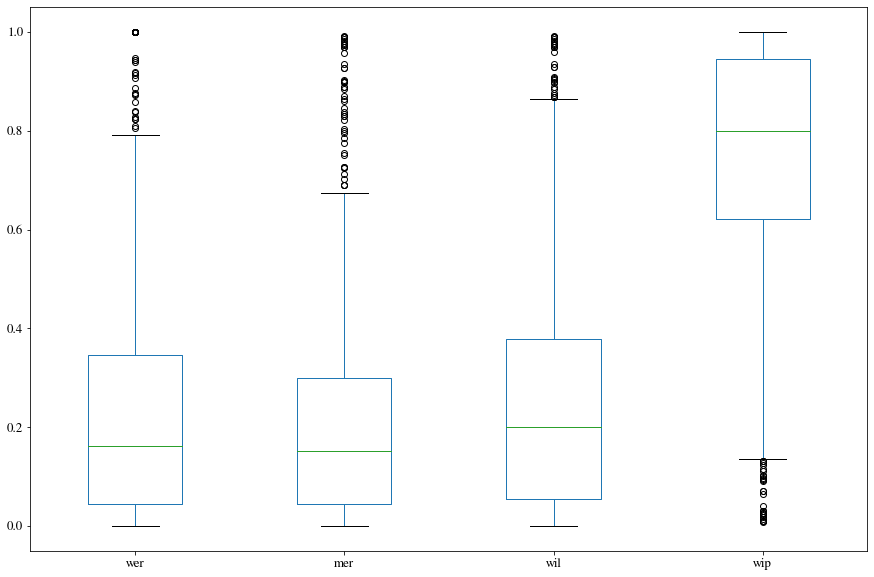

In [5]:
df[['wer', 'mer', 'wil', 'wip']].plot.box(figsize=(15, 10))

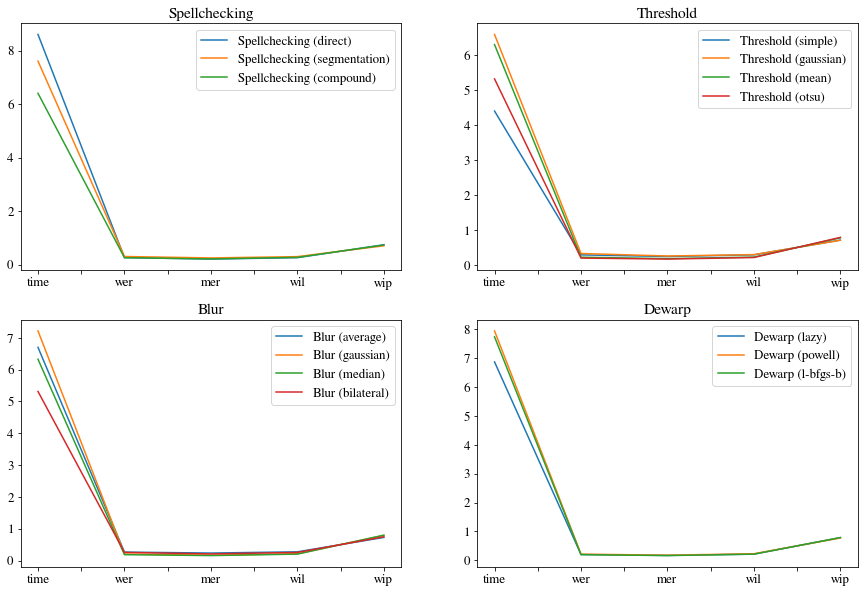

In [6]:
metrics = df.iloc[:, 11:]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i in range(1, 4):
    metrics[i::15].mean().plot(ax=axes[0, 0])
    
for i in range(4, 8):
    metrics[i::15].mean().plot(ax=axes[0, 1])
    
for i in range(8, 12):
    metrics[i::15].mean().plot(ax=axes[1, 0])
    
for i in range(12, 15):
    metrics[i::15].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Spellchecking')
axes[0, 1].set_title('Threshold')
axes[1, 0].set_title('Blur')
axes[1, 1].set_title('Dewarp')

axes[0, 0].legend(legends[1:4])
axes[0, 1].legend(legends[4:8])
axes[1, 0].legend(legends[8:12])
axes[1, 1].legend(legends[12:15])

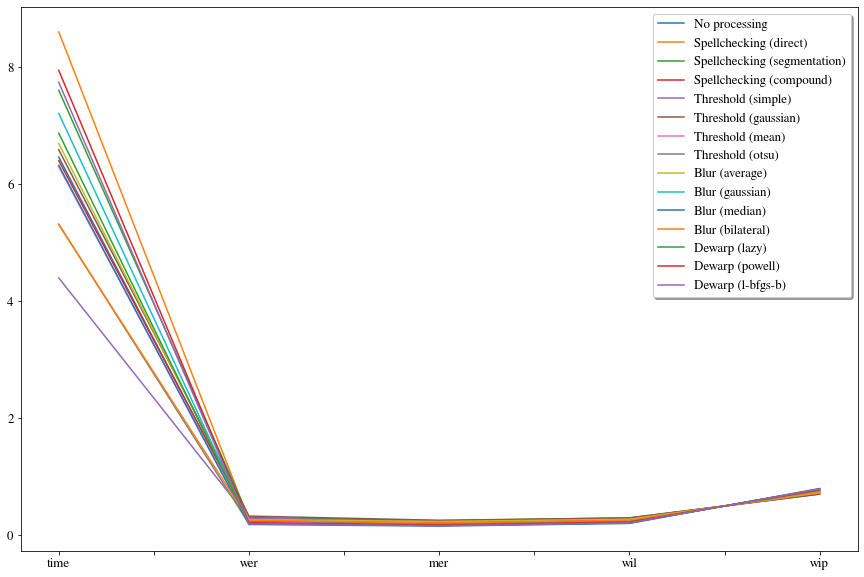

In [7]:
results = pd.DataFrame(columns=['wer', 'mer', 'wil', 'wip', 'time'])

for i in range(15):
    mean = metrics[i::15].mean().rename(legends[i])
    results = results.append(mean)
    mean.plot(figsize=(15, 10))
plt.legend(legends, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

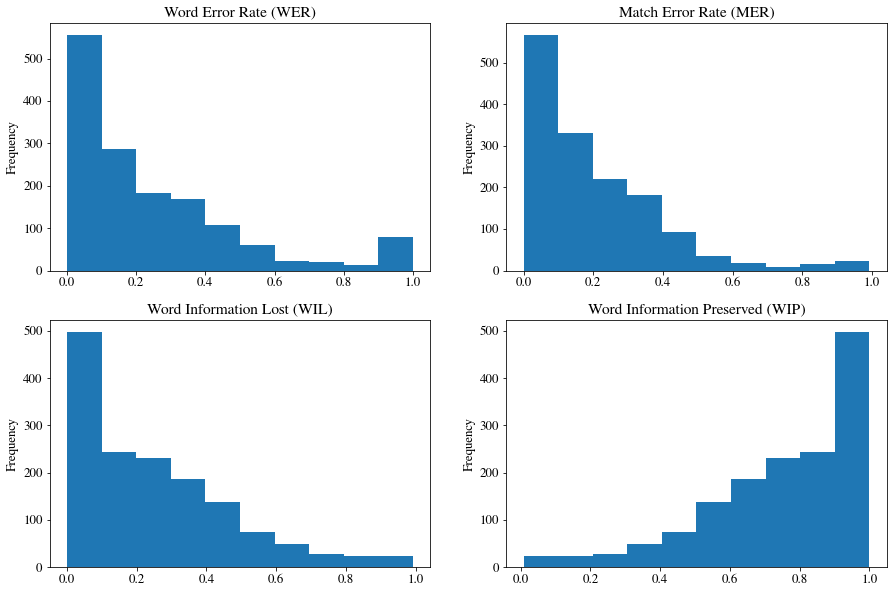

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['wer'].plot.hist(ax=axes[0, 0])
df['mer'].plot.hist(ax=axes[0, 1])
df['wil'].plot.hist(ax=axes[1, 0])
df['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

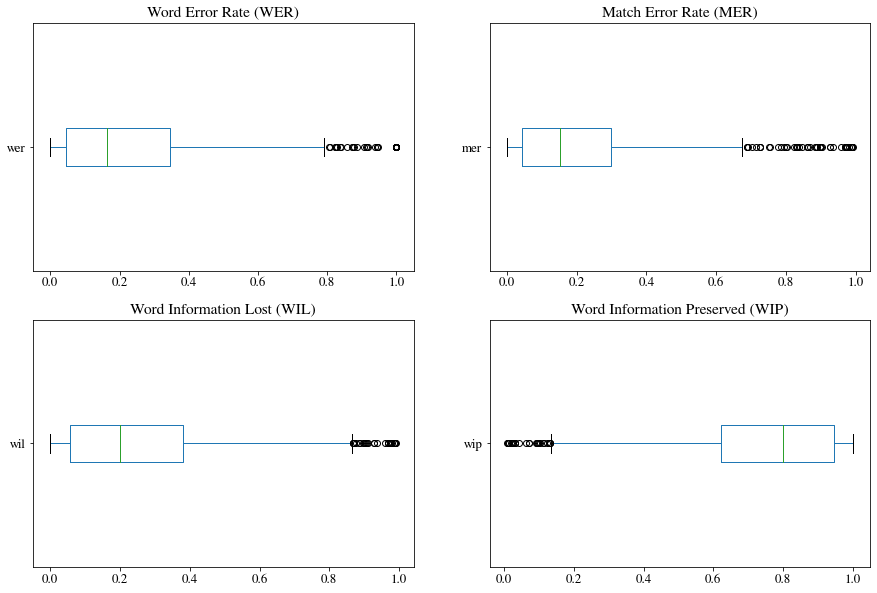

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['wer'].plot.box(ax=axes[0, 0], vert=False)
df['mer'].plot.box(ax=axes[0, 1], vert=False)
df['wil'].plot.box(ax=axes[1, 0], vert=False)
df['wip'].plot.box(ax=axes[1, 1], vert=False)

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

In [10]:
results.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &       wer &       mer &       wil &       wip &      time \\\\\n\\midrule\nNo processing                &  0.236891 &  0.193541 &  0.245466 &  0.754534 &  6.465635 \\\\\nSpellchecking (direct)       &  0.261058 &  0.206050 &  0.258003 &  0.741997 &  8.607419 \\\\\nSpellchecking (segmentation) &  0.301717 &  0.248339 &  0.297171 &  0.702829 &  7.608705 \\\\\nSpellchecking (compound)     &  0.256305 &  0.211407 &  0.269841 &  0.730159 &  6.406634 \\\\\nThreshold (simple)           &  0.287350 &  0.241329 &  0.288872 &  0.711128 &  4.400169 \\\\\nThreshold (gaussian)         &  0.327223 &  0.255505 &  0.295137 &  0.704863 &  6.591420 \\\\\nThreshold (mean)             &  0.221237 &  0.180660 &  0.224604 &  0.775396 &  6.301038 \\\\\nThreshold (otsu)             &  0.195864 &  0.168029 &  0.211728 &  0.788272 &  5.320047 \\\\\nBlur (average)               &  0.265557 &  0.235019 &  0.274194 &  0.725806 &  6.698081 \\\\\nBlur (gaussian)            

<AxesSubplot:>

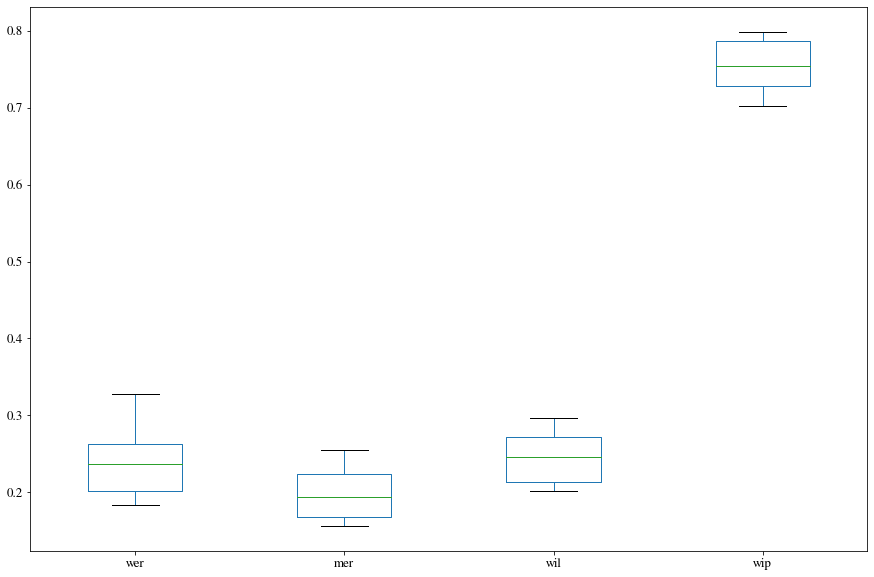

In [11]:
results.iloc[:, :-1].plot.box(figsize=(15, 10))

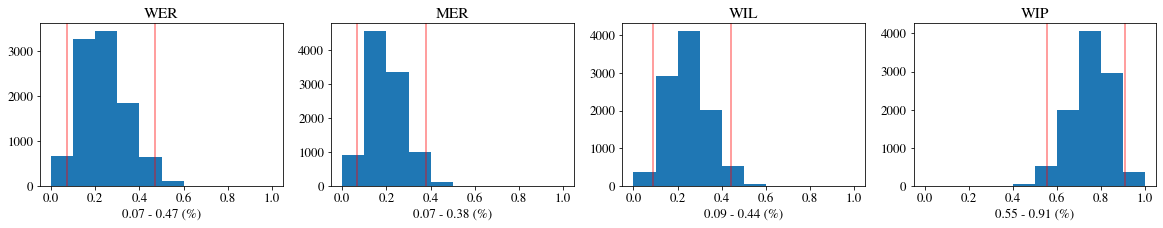

In [12]:
# Confidence Interval
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
cols = ['wer', 'mer', 'wil', 'wip']

for i, col in enumerate(cols):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[col], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(col.upper());


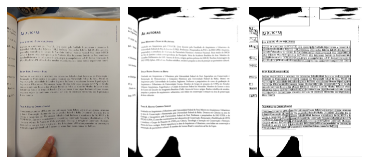

In [16]:
path = '../data/images/'
images = ['book.jpg', 'book_thresh.png', 'book_thresh.png']

fig, axes = plt.subplots(1, 3, figsize=(5, 5), constrained_layout=True)
for i, image in enumerate(images):
    img = cv2.imread(path + image)[:,:,::-1]
    axes[i].imshow(img)
    axes[i].axis('off')
# plt.savefig('tesseract_pipe.eps', format='eps')